In [1]:
from src import plot_acc, plot_loss, plot_params
import matplotlib.pyplot as plt
import pickle

plt.style.use('seaborn-darkgrid')

In [2]:
with open('pickles/rgb_results_v1.pickle', 'rb') as f:
    rgb = pickle.load(f)
    
with open('pickles/audio_results_v1.pickle', 'rb') as f:
    audio = pickle.load(f)

In [3]:
dnn_legends = ['128 units', 
               '256 units', 
               '512 units', 
               '1024 units', 
               '128, 256 units', 
               '256, 512 units',
               '512, 1024 units', 
               '128, 256, 512 units', 
               '256, 512, 1024 units', 
               '128, 256, 512, 1024 units']

cnn_lstm_gru_legends= ['128, 128, 128 units', 
                       '128, 256, 256 units', 
                       '128, 256, 512 units', 
                       '256, 256, 256 units', 
                       '256, 256, 512 units', 
                       '256, 512, 512 units']

# RGB Features

Firstly, let's analyze the models based on RGB features.

## DNN Models

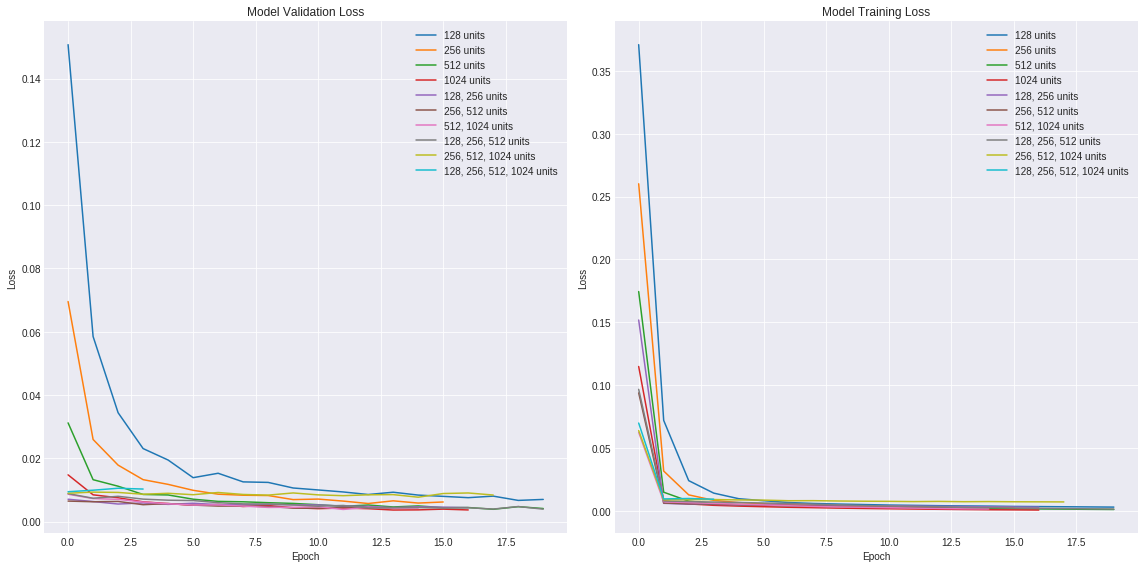

In [4]:
plot_loss(rgb['losses'], sel='DNN', legends=dnn_legends, loc='upper right')

As we can see from above, deeper the network, lower the epoch required to minimize the loss. However this alone doesn't give us much information how the models performed due to similar results. Let's see accuracy values

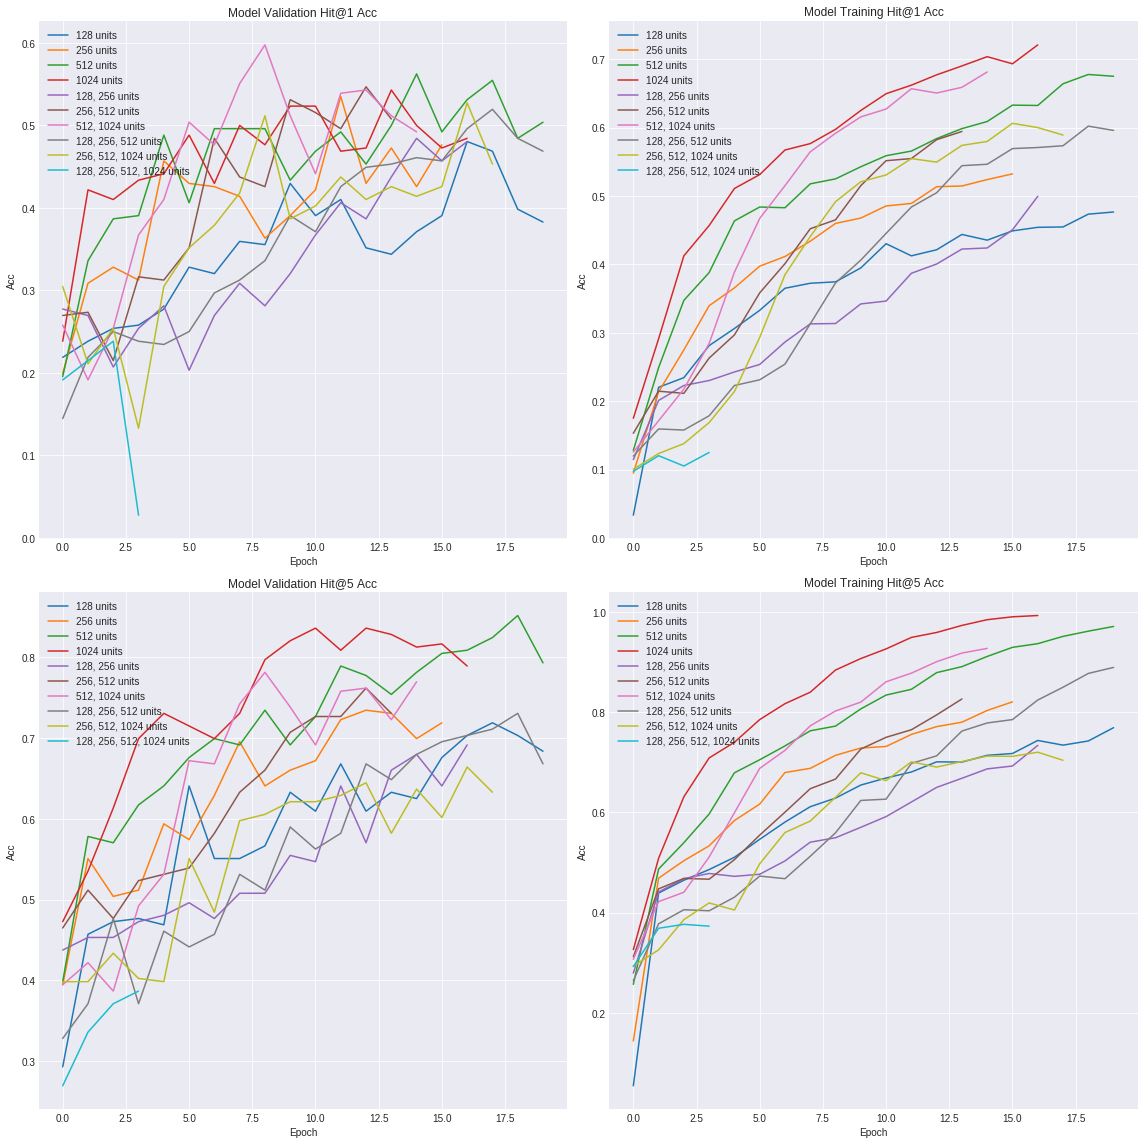

In [5]:
plot_acc(rgb['accs'], sel='DNN', legends=dnn_legends)

By looking at these graphs, we can see that models 1024 and 512 performs well compared to others. Specially adding fourth layer appears to have no effect at all. Looking at the models with 3 layers we can see it doesn't effect the model so much. From DNN models, it may reasonable to go forward with the following models:
- 256 units
- 512 units
- 1024 units
- 256, 512 units
- 512, 1024 units

## CNN Models

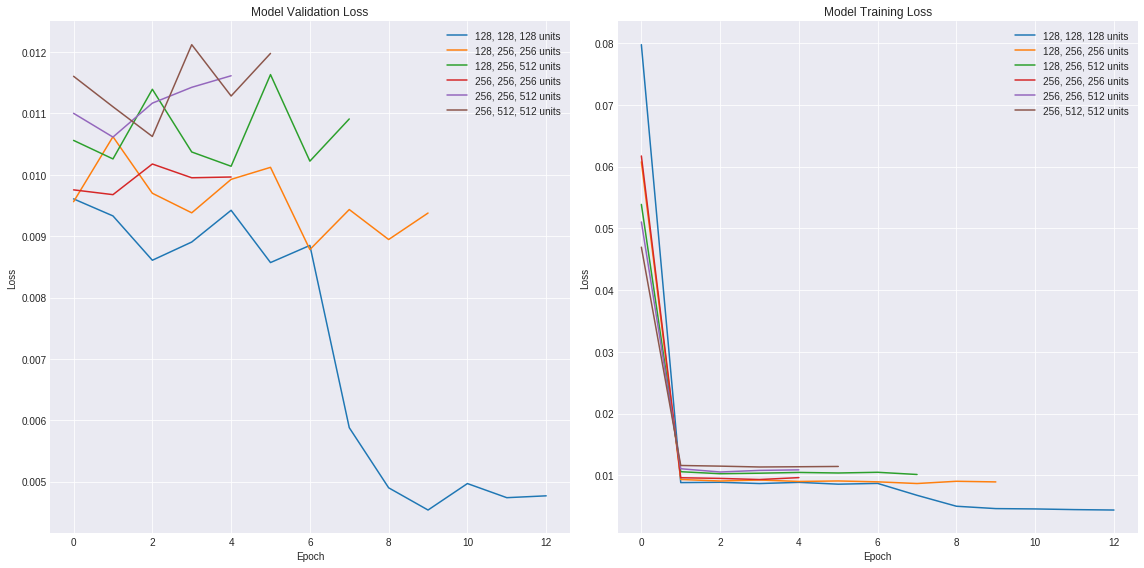

In [7]:
plot_loss(rgb['losses'], sel='CNN', legends=cnn_lstm_gru_legends, loc='upper right')

By looking at the loss functions, we can see that it decreases loss better than straightforward dnn models. 

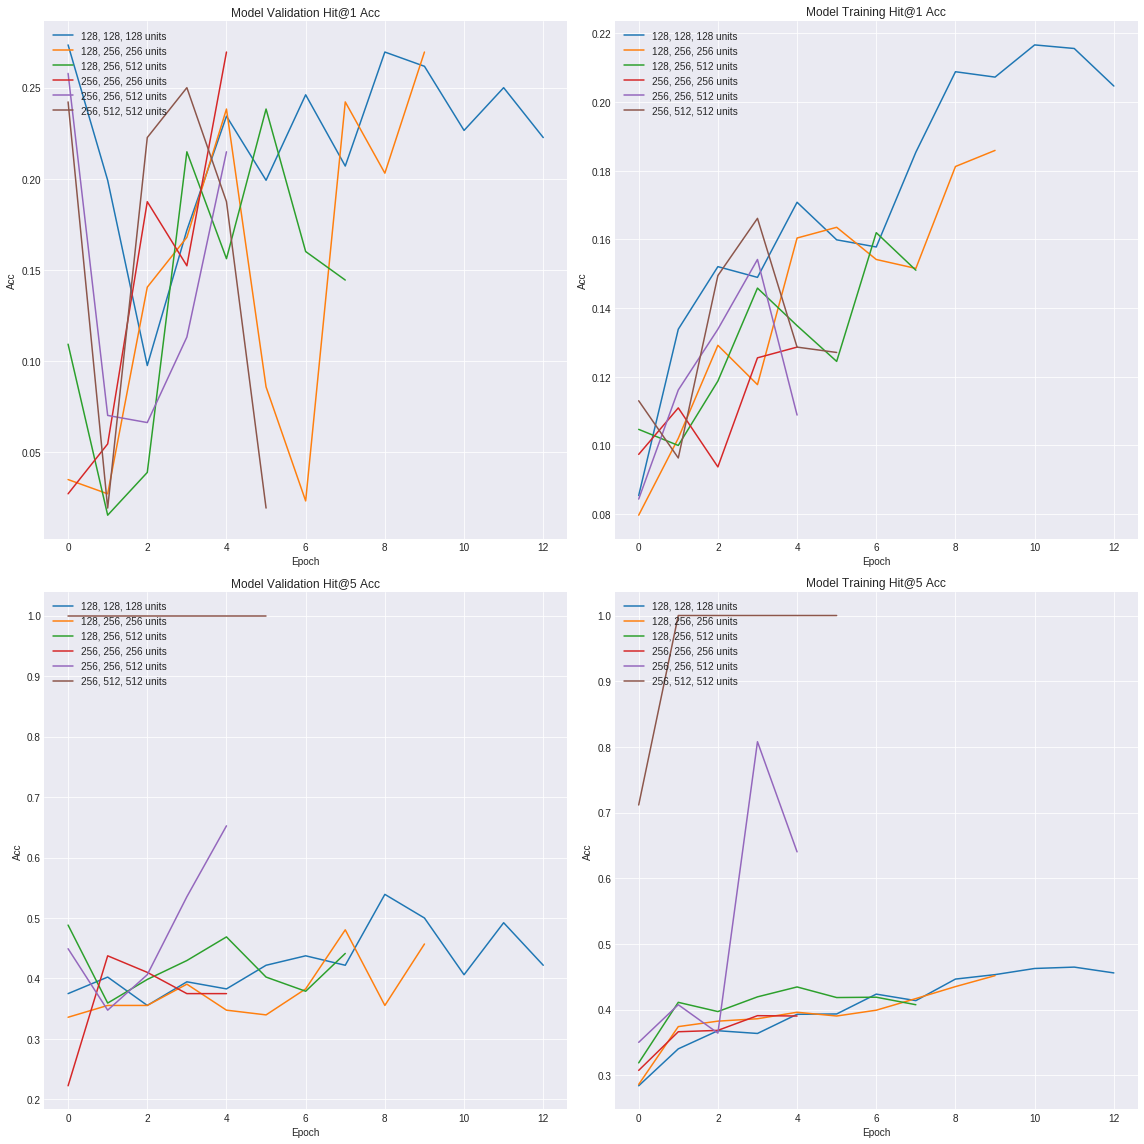

In [8]:
plot_acc(rgb['accs'], sel='CNN', legends=cnn_lstm_gru_legends)

We see that somehow models performs badly on Hit@1 metric compared to Hit@5. Looking at the graphs two models selected for further tuning:
- 128, 128, 128 units
- 256, 512, 512 units

## LSTM Models

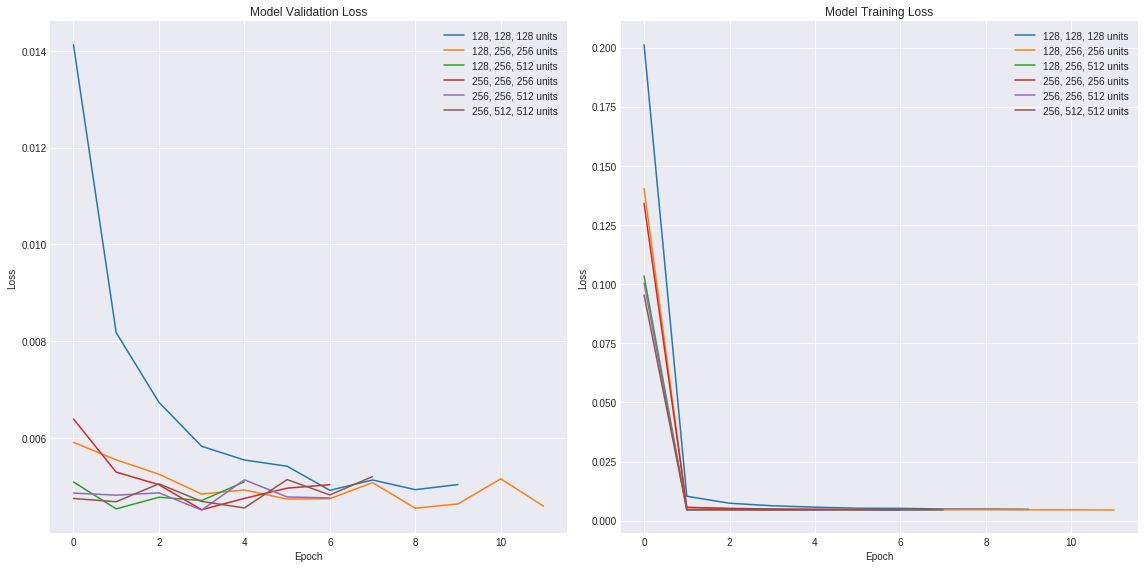

In [9]:
plot_loss(rgb['losses'], sel='LSTM', legends=cnn_lstm_gru_legends, loc='upper right')

By looking at the loss we can see again that all models performs in similar manner. To eliminate some of them, let's see about the acc parameters

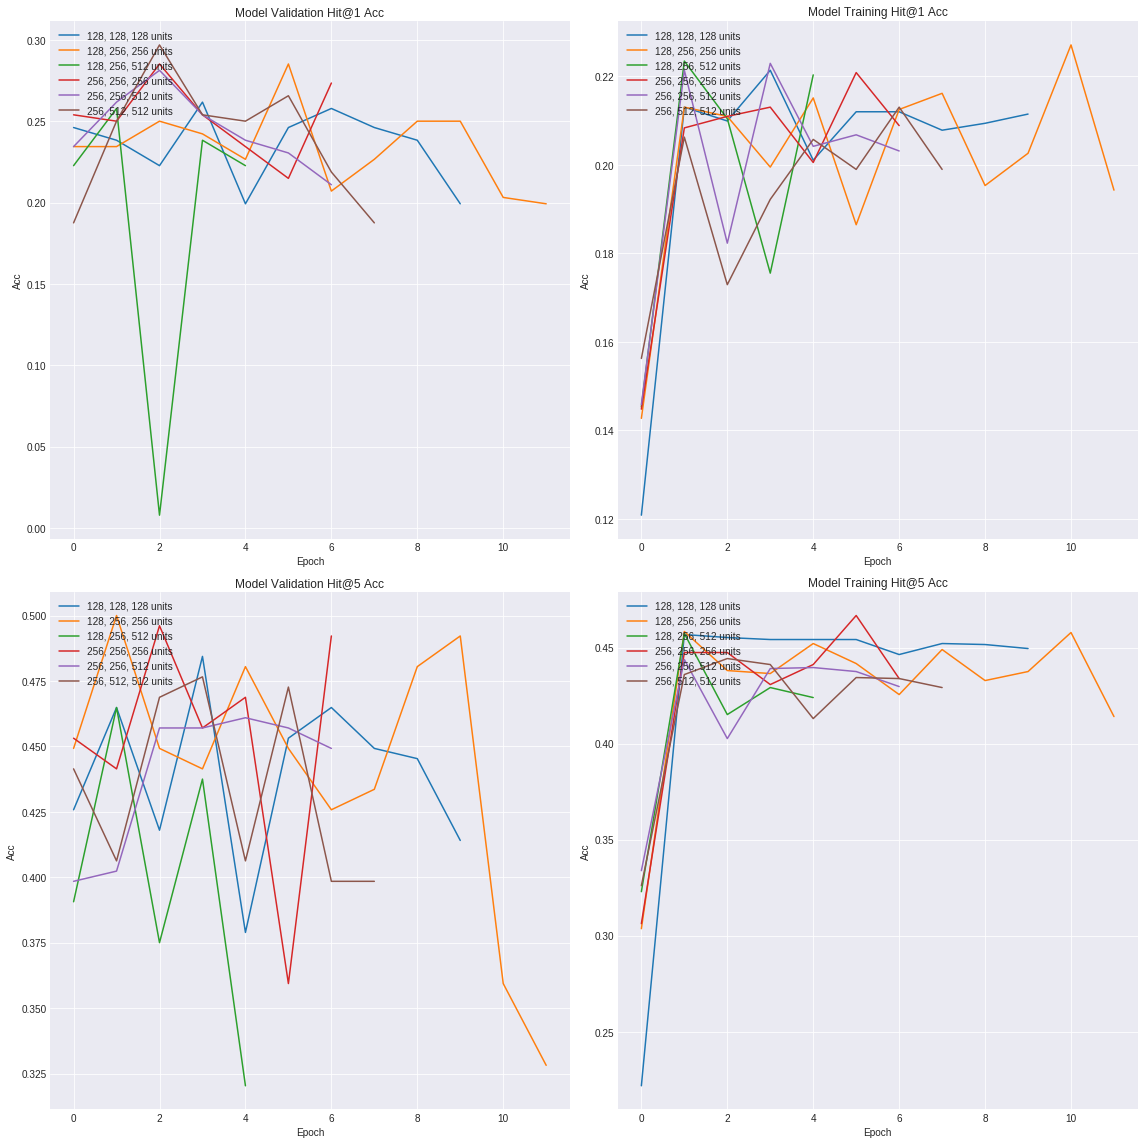

In [10]:
plot_acc(rgb['accs'], sel='LSTM', legends=cnn_lstm_gru_legends)

It's hard to separate models by looking at this mixed graph however we can eliminate the worst performing model to decrease models size. Therefore, following models are selected:
- 256, 256, 256 units
- 256, 256, 512 units
- 256, 512, 512 units

## GRU Models

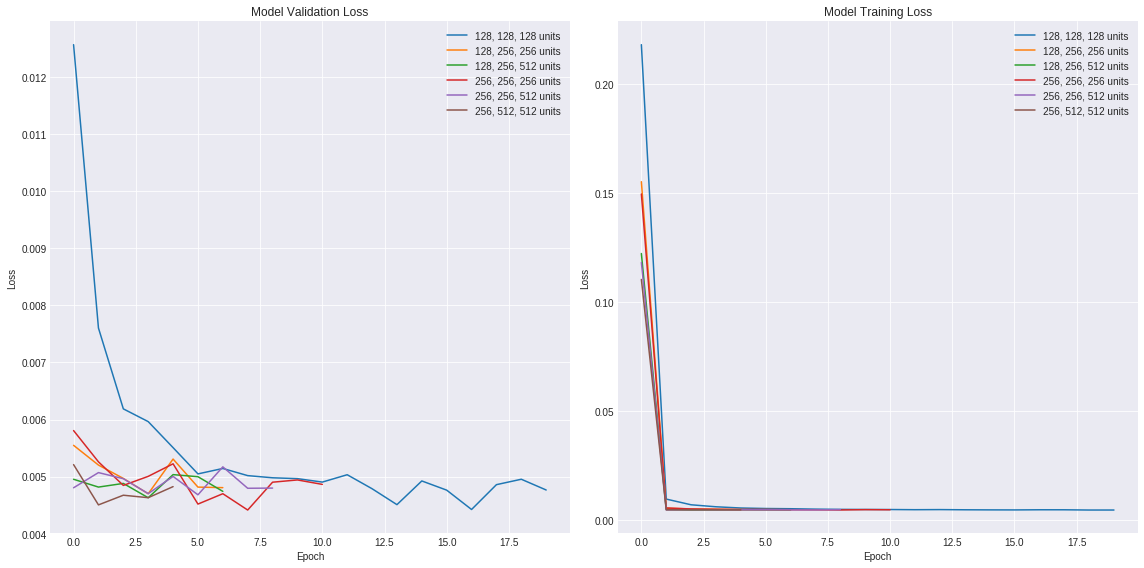

In [11]:
plot_loss(rgb['losses'], sel='GRU', legends=cnn_lstm_gru_legends, loc='upper right')

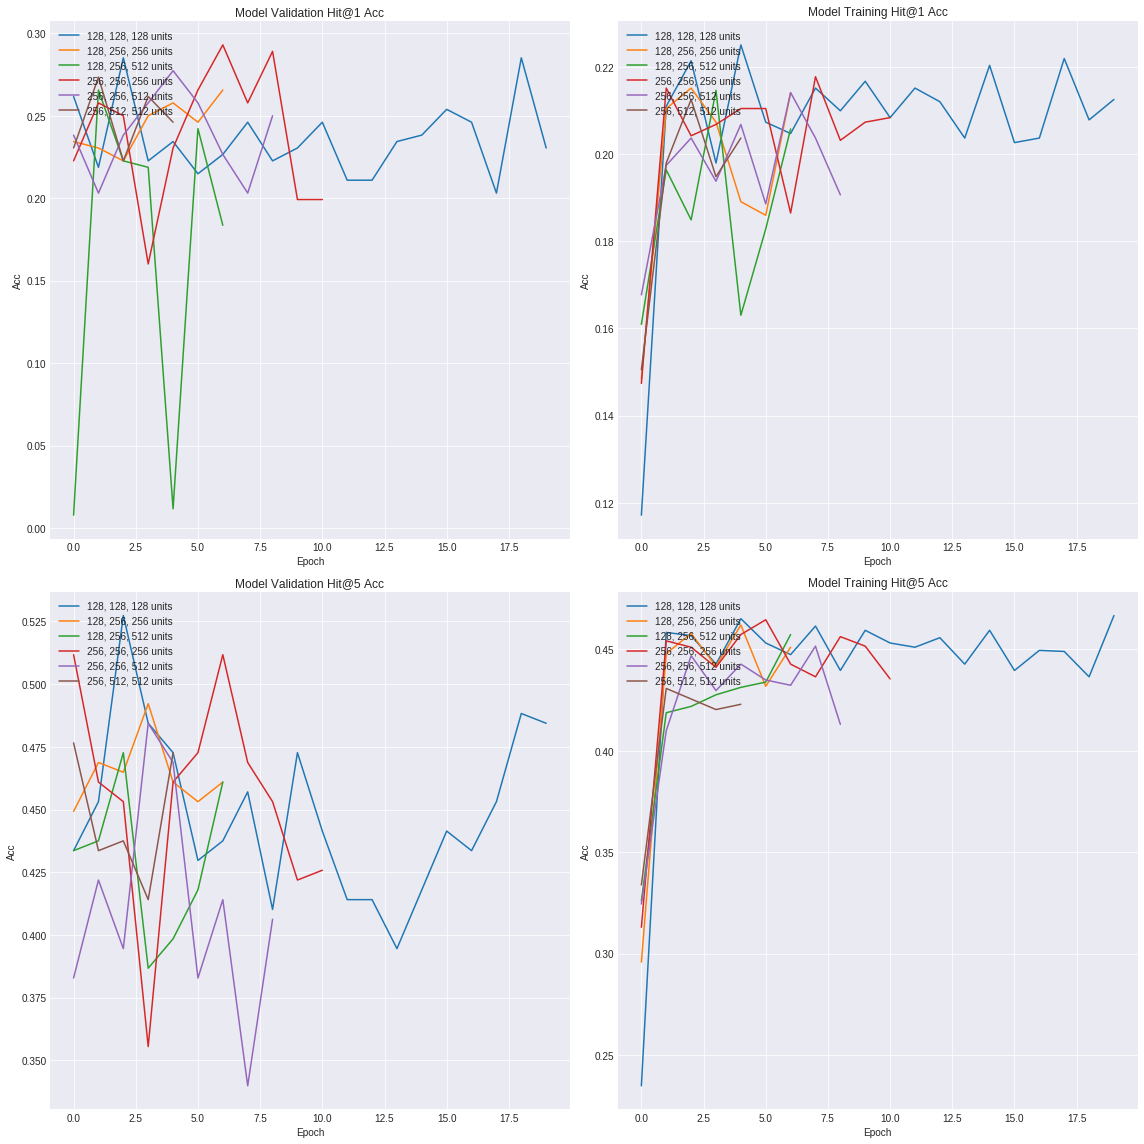

In [12]:
plot_acc(rgb['accs'], sel='GRU', legends=cnn_lstm_gru_legends)

Similar to LSTM analysis following GRU models selected:
- 128, 128, 128 units
- 128, 256, 256 units
- 256, 256, 256 units

## PARAMETERS

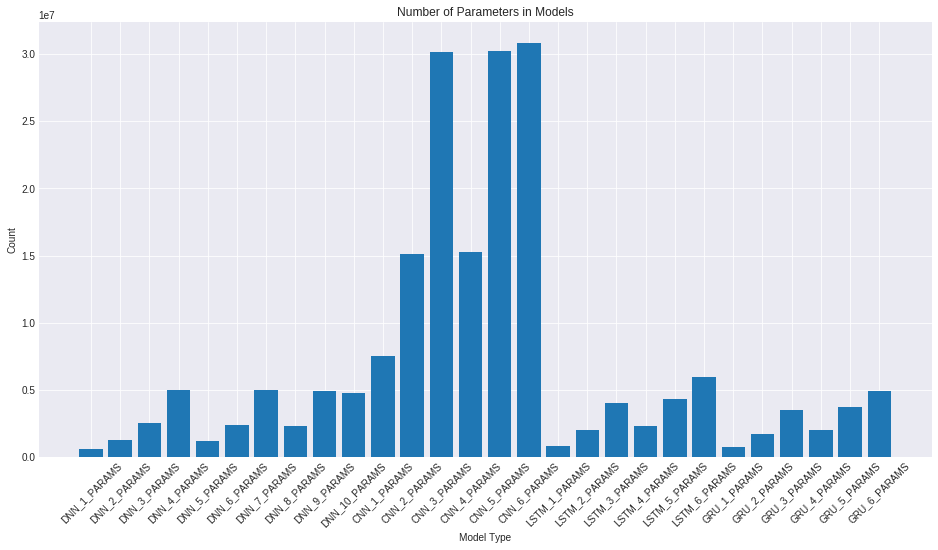

In [13]:
plot_params(rgb['params'])

# AUDIO Features

Let's analyze the models based on Audio features.

## DNN Models

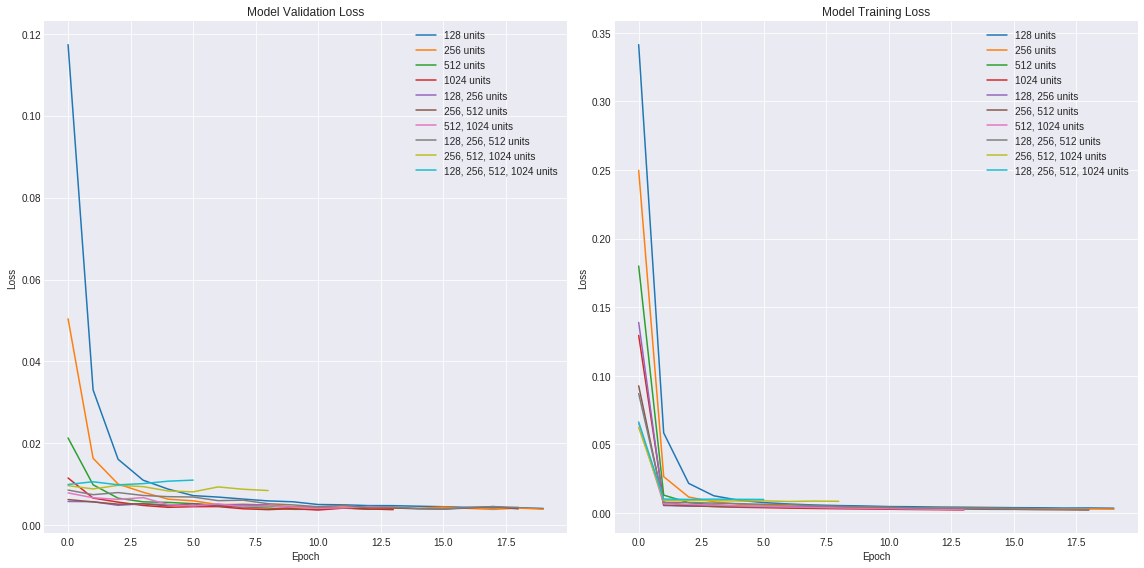

In [14]:
plot_loss(audio['losses'], sel='DNN', legends=dnn_legends, loc='upper right')

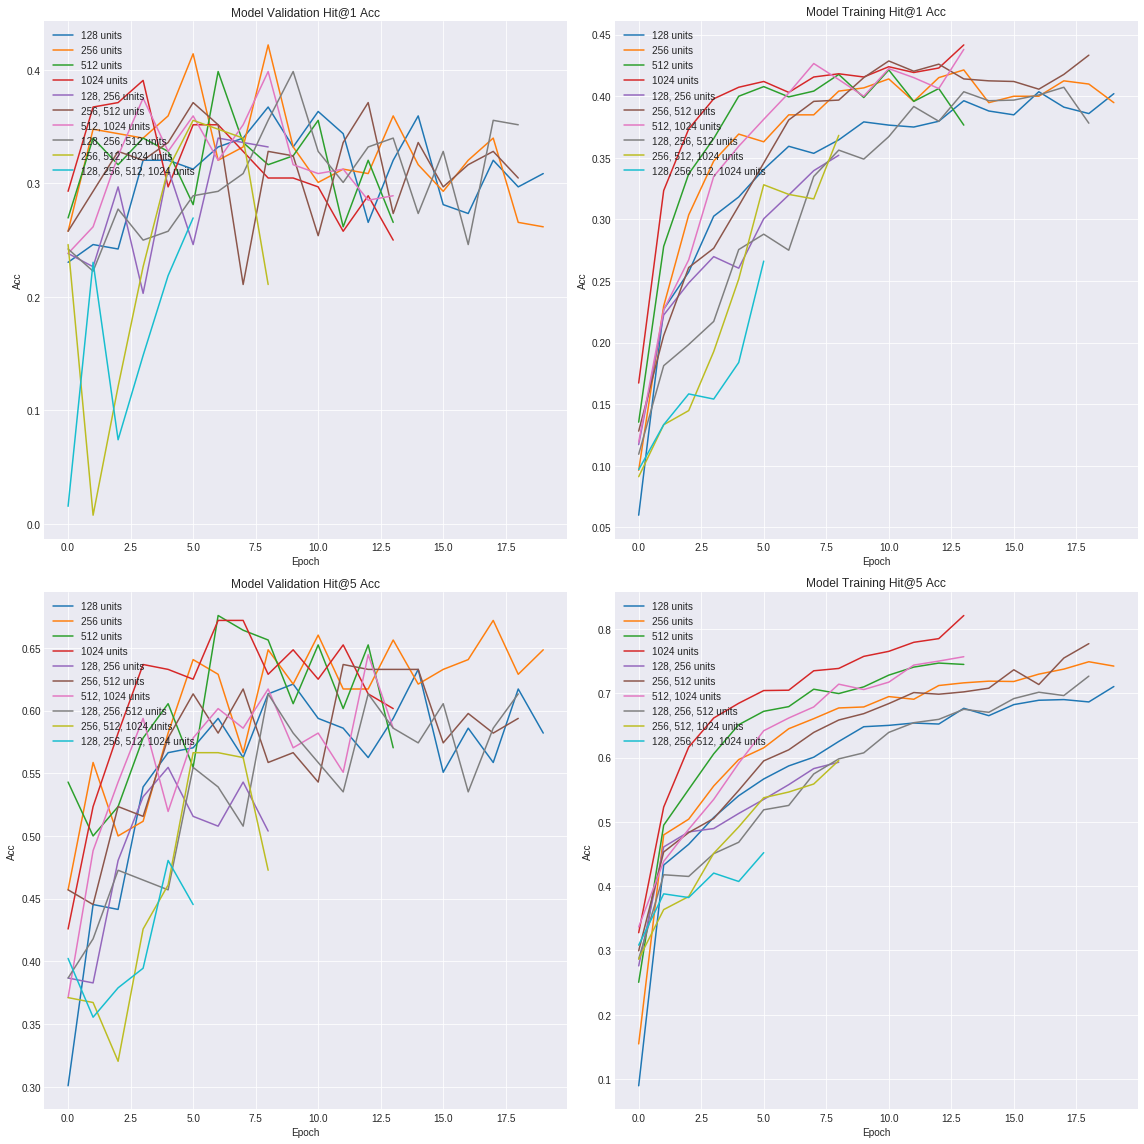

In [15]:
plot_acc(audio['accs'], sel='DNN', legends=dnn_legends)

We see that deeper models performs worse compared to others. Models with 1 and 2 layers are taken into consideration: 
- 256 units
- 512 units
- 1024 units
- 256, 512 units
- 512, 1024 units

## CNN Models

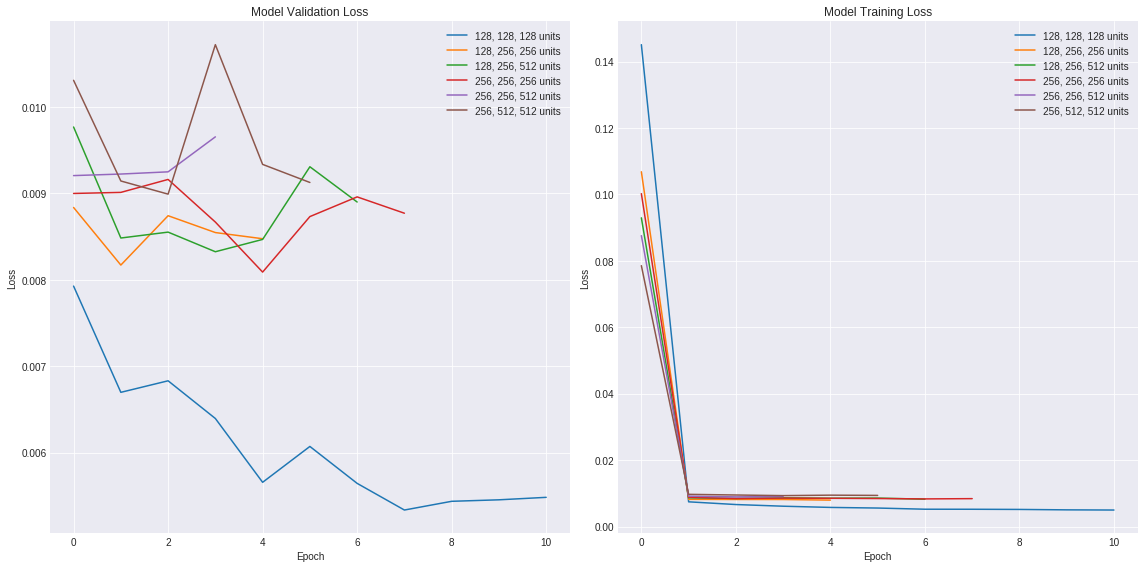

In [16]:
plot_loss(audio['losses'], sel='CNN', legends=cnn_lstm_gru_legends, loc='upper right')

By looking at the loss functions, we can see that it decreases loss better than straightforward dnn models. 

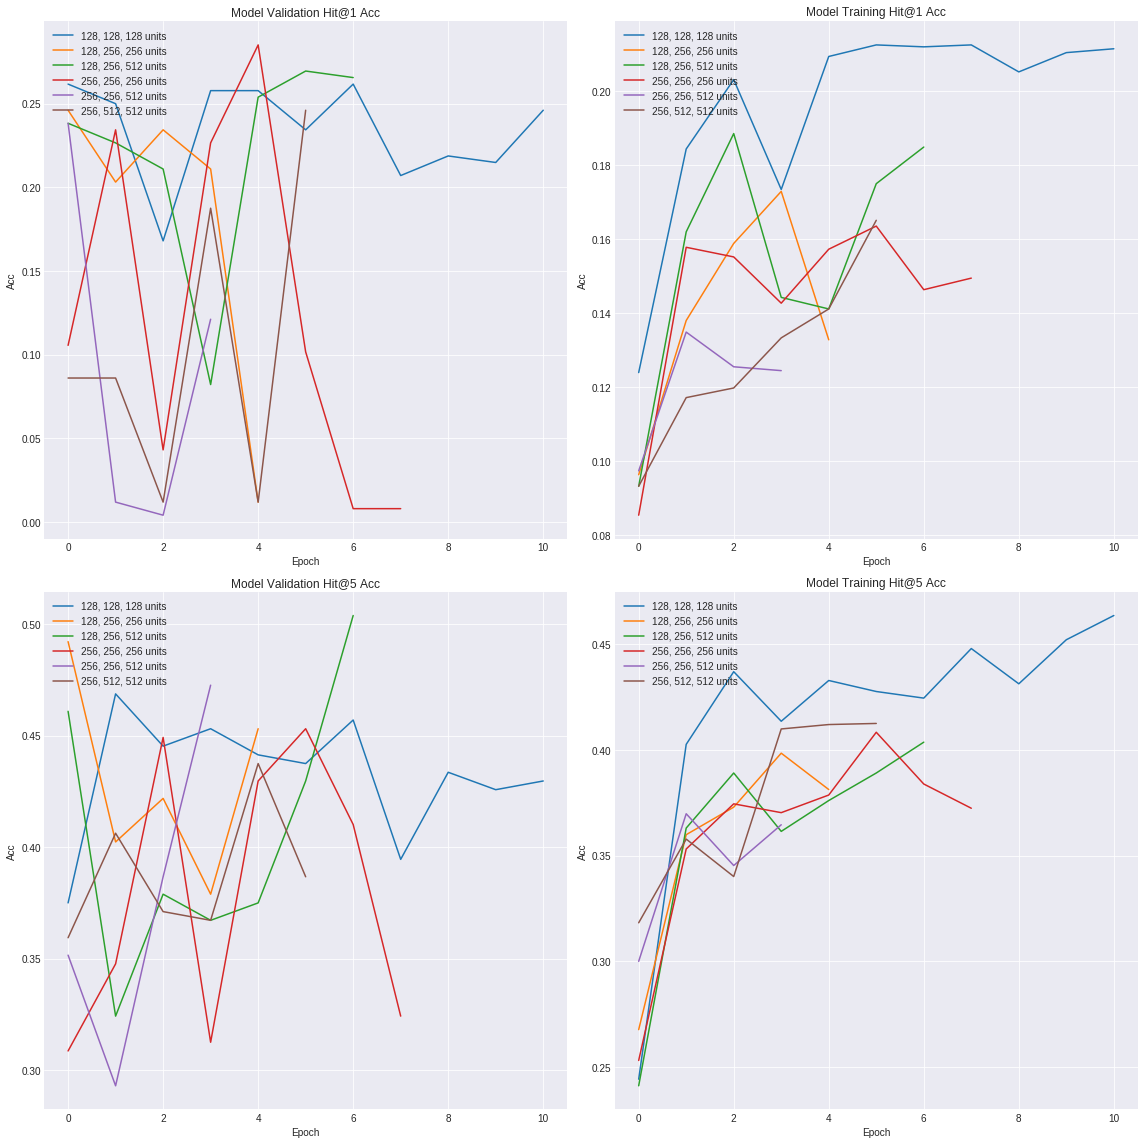

In [17]:
plot_acc(audio['accs'], sel='CNN', legends=cnn_lstm_gru_legends)

- 128, 128, 128 units
- 128, 256, 512 units

## LSTM Models

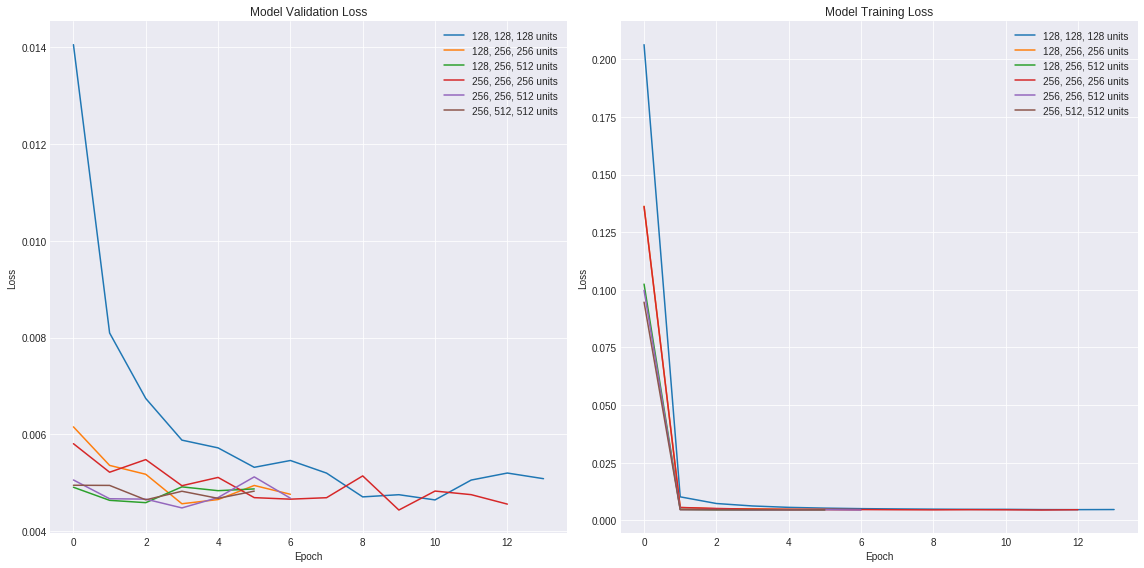

In [18]:
plot_loss(audio['losses'], sel='LSTM', legends=cnn_lstm_gru_legends, loc='upper right')

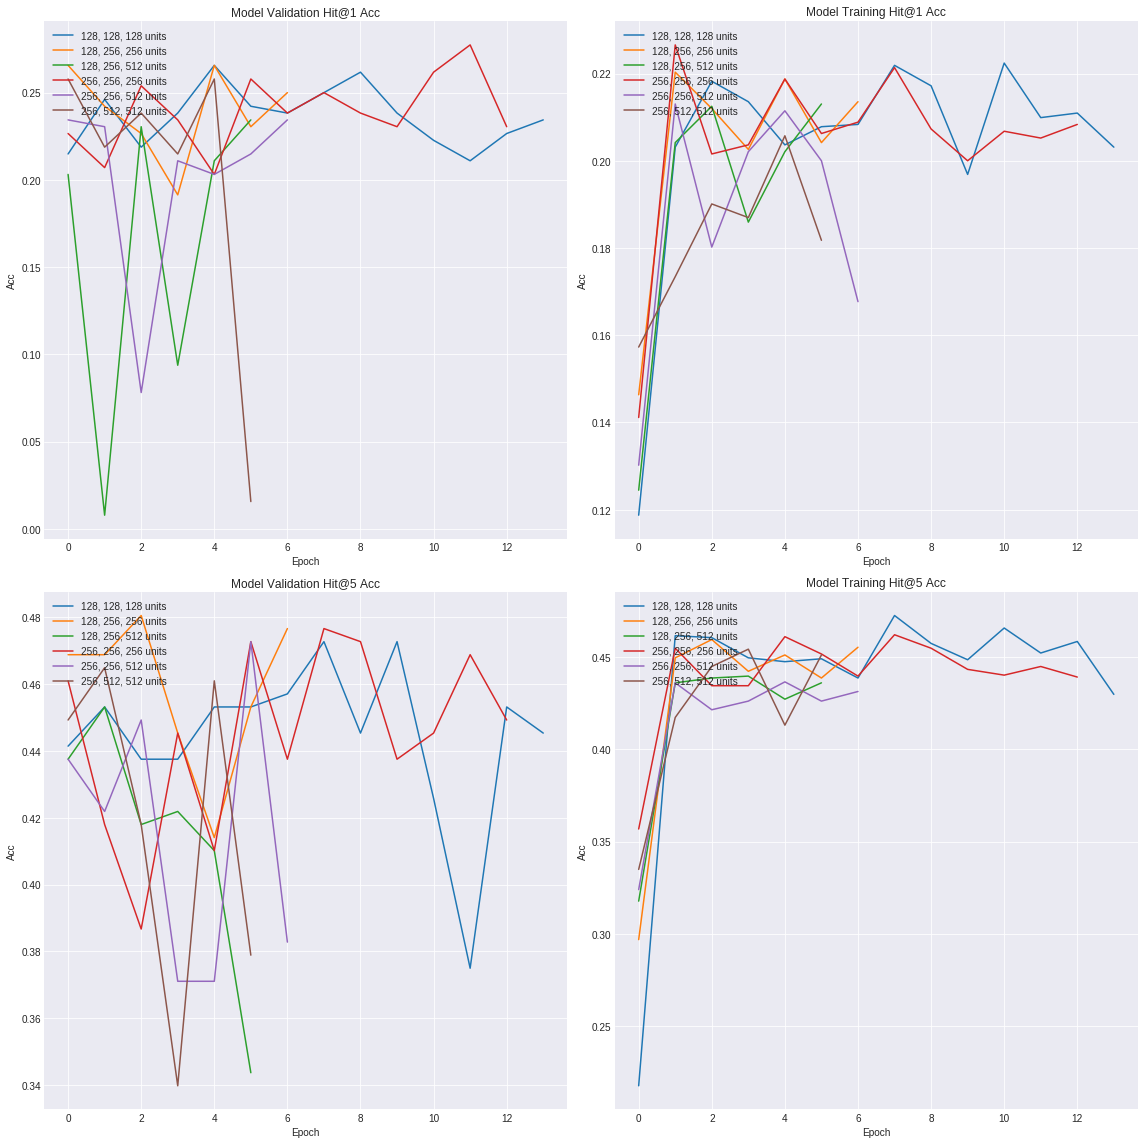

In [19]:
plot_acc(audio['accs'], sel='LSTM', legends=cnn_lstm_gru_legends)

- 128, 128, 128 units
- 128, 256, 256 units
- 256, 256, 256 units

## GRU Models

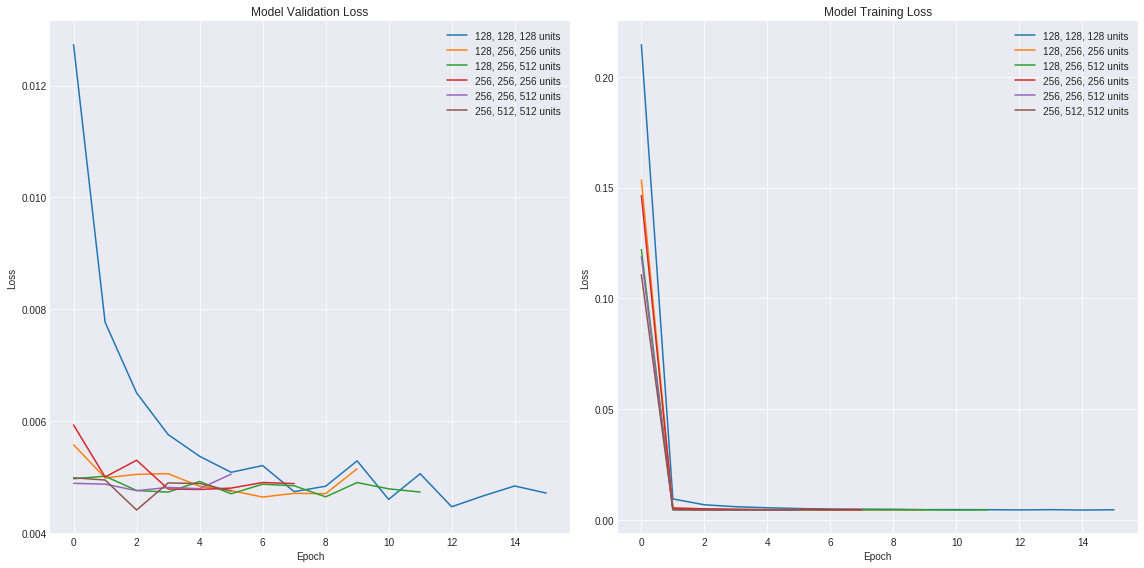

In [20]:
plot_loss(audio['losses'], sel='GRU', legends=cnn_lstm_gru_legends, loc='upper right')

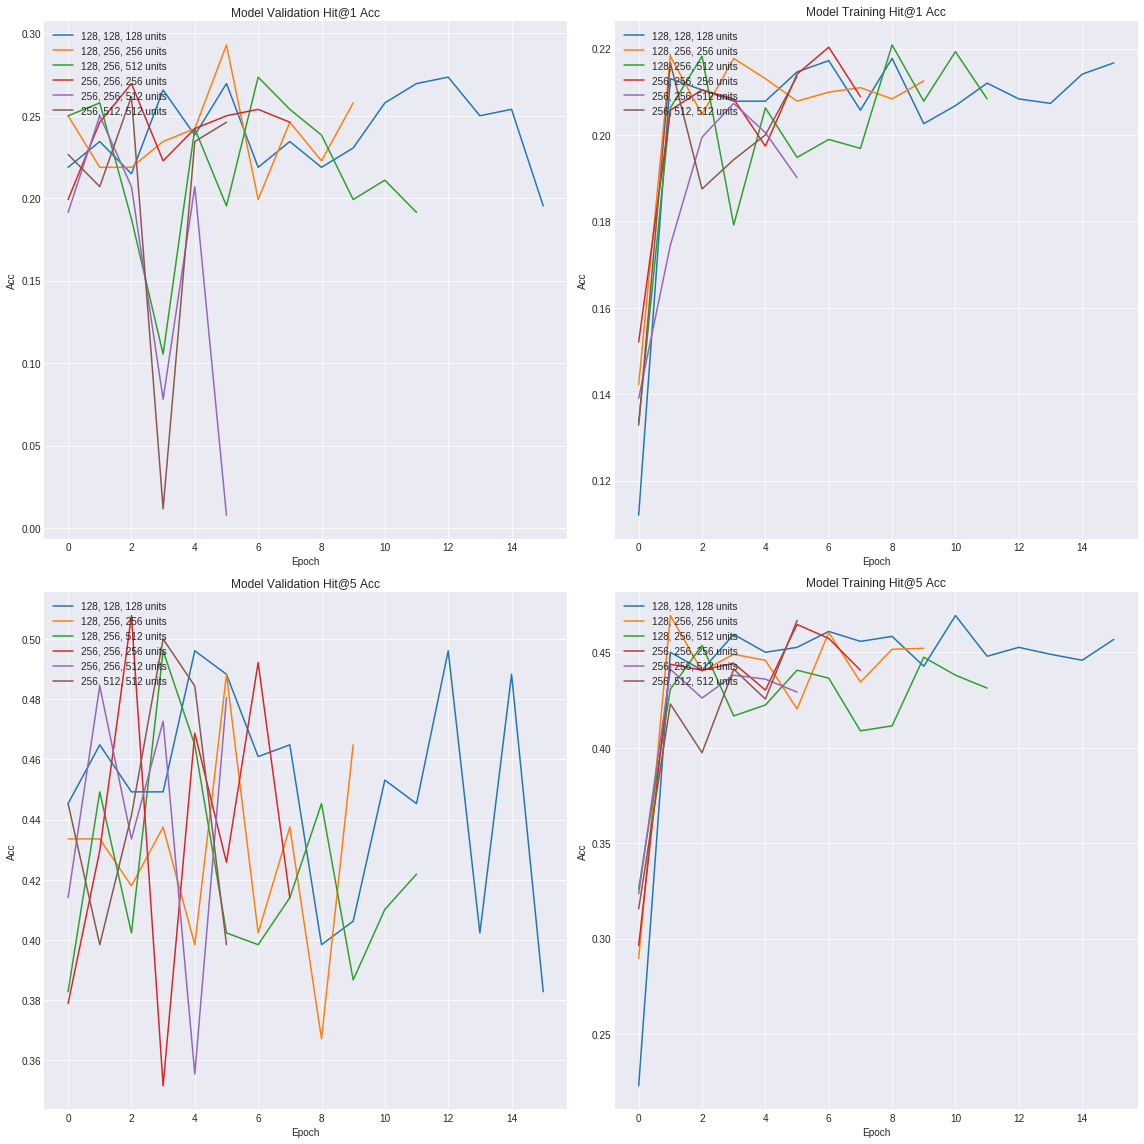

In [21]:
plot_acc(audio['accs'], sel='GRU', legends=cnn_lstm_gru_legends)

- 128, 128, 128 units
- 128, 256, 256 units
- 128, 256, 512 units

## PARAMETERS

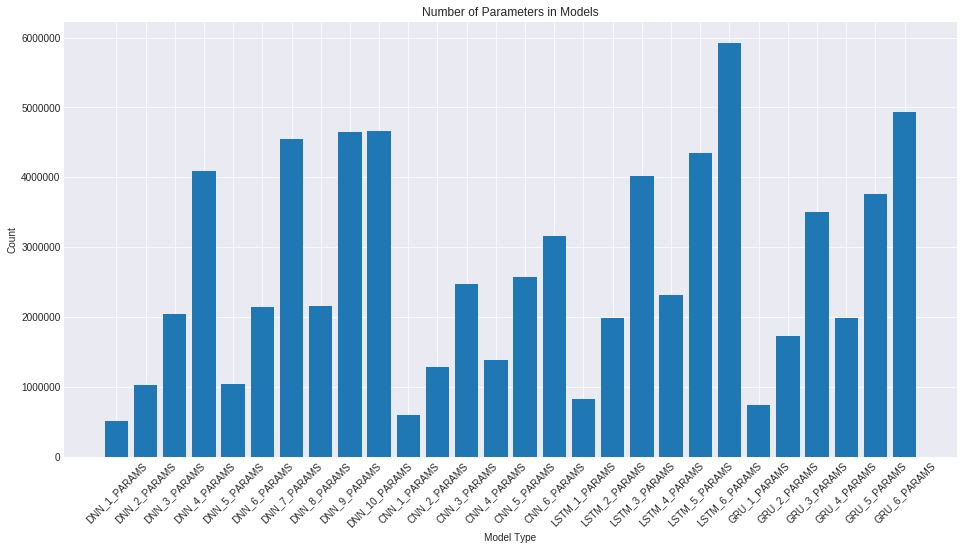

In [22]:
plot_params(audio['params'])